In [451]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


% matplotlib inline


plt.xkcd()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PTS', ylabel='MVP_Share'>

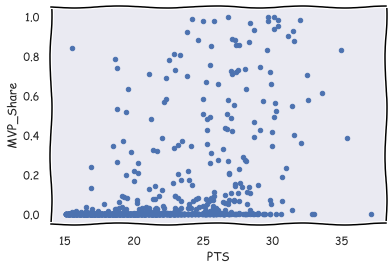

In [465]:
df = pd.read_csv('../../Data/Players With Award Data/complete_players_with_award_voting.csv', index_col=0)
df = df[(df.PTS > 15) & (df.GS > 45) & (df.MP > 30) & (df.FGA > 10) & (df.TRB > 3) & (df.AST > 2.5)]


df = sm.add_constant(df)

X_train, X_test, y_train, y_test = train_test_split(df[['PTS','const']], df['MVP_Share'], test_size=.3, random_state=42)

df.plot('PTS','MVP_Share',kind='scatter')

# Simple Linear Regression and Assumptions

In [466]:



model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MVP_Share   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     200.7
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           7.55e-41
Time:                        13:06:35   Log-Likelihood:                 342.76
No. Observations:                 808   AIC:                            -681.5
Df Residuals:                     806   BIC:                            -672.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0199      0.001     14.167      0.000       0.017       0.023
const         -0.3563      0.030    -12.007      0.000      -0.415      -0.298
==============================================================================
Omnibus:                      510.221   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4446.396
Skew:                           2.851   Prob(JB):                         0.00
Kurtosis:                      12.977   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [454]:
fitted_values = model.fittedvalues
ex_residuals_m = model.resid
ex_model_m_norm_residuals = model.get_influence().resid_studentized_internal

ex_model_m_norm_residuals_abs_sqrt = (np.abs(ex_model_m_norm_residuals)) ** (1 / 2)

ex_model_m_abs_resid = np.abs(ex_residuals_m)

ex_training = pd.concat([X_train, y_train], axis='columns')


#### Checking Linear

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



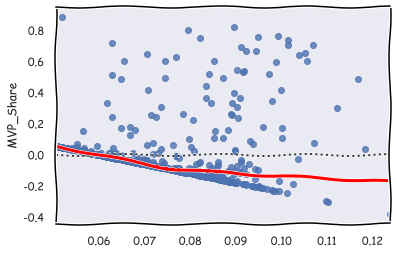

In [455]:


plot = plt.figure(1)
plot.axes[0] = sns.residplot(fitted_values, 'MVP_Share', data=ex_training, lowess=True,
                             line_kws={'color': 'red', 'lw': 3, })

# Linearish. I'd say yes

#### Checking Normal Distribution

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.



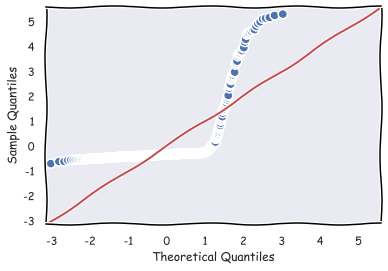

In [456]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(ex_model_m_norm_residuals)
plot_2 = QQ.qqplot(line='45', color='red', lw=1)

# Not Normally Distributed

#### Checking Equal Variance

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

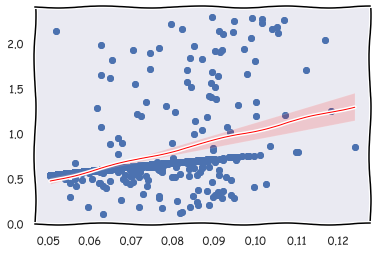

In [457]:
plot_lm_3 = plt.figure(3)

plt.scatter(fitted_values, ex_model_m_norm_residuals_abs_sqrt, )
sns.regplot(fitted_values, ex_model_m_norm_residuals_abs_sqrt, line_kws={'color': 'red', 'lw': 1, })

# not Equal Variance

In [458]:
ex_test_m = model.outlier_test()
test_final_m = ex_test_m[ex_test_m['bonf(p)'] < 0.05]

X_train_no_outliers = X_train.drop(test_final_m.index)
y_train_no_outliers = y_train.drop(test_final_m.index)



In [459]:
model_no_outliers = sm.OLS(y_train_no_outliers, X_train_no_outliers).fit()

model_no_outliers.summary()

# The r2 definitely improves, but is not good. Unsurprisingly.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              MVP_Share   R-squared (uncentered):                   0.122
Model:                            OLS   Adj. R-squared (uncentered):              0.121
Method:                 Least Squares   F-statistic:                              109.6
Date:                Fri, 15 Jul 2022   Prob (F-statistic):                    4.19e-24
Time:                        12:07:18   Log-Likelihood:                          534.26
No. Observations:                 791   AIC:                                     -1067.
Df Residuals:                     790   BIC:                                     -1062.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0022      0.000     10.468      0.000       0.002       0.003
==============================================================================
Omnibus:                      671.885   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10749.115
Skew:                           4.021   Prob(JB):                         0.00
Kurtosis:                      19.170   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='PTS', ylabel='MVP_Share'>

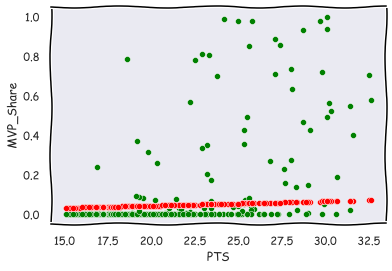

In [463]:
prediction = model_no_outliers.predict(X_test)
#
sns.scatterplot(x=X_test, y=y_test, color='green')
sns.scatterplot(x=X_test, y=prediction, color='red')


# Seems like the more you score, the more mvp votes you get,

# Multiple Linear Regression

In [467]:
df = pd.read_csv('../../Data/Players With Award Data/complete_players_with_award_voting.csv', index_col=0)
df = df[(df.PTS > 15) & (df.GS > 45) & (df.MP > 30) & (df.FGA > 10) & (df.TRB > 3) & (df.AST > 2.5)]
df = sm.add_constant(df)
X_train, X_test, y_train, y_test = train_test_split(df[['PTS', 'AST', 'TRB','const']], df['MVP_Share'], test_size=.3,
                                                    random_state=42)


In [468]:
ex_model_m = sm.OLS(y_train, X_train).fit()

ex_model_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MVP_Share   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     99.21
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.22e-54
Time:                        13:10:27   Log-Likelihood:                 380.17
No. Observations:                 808   AIC:                            -752.3
Df Residuals:                     804   BIC:                            -733.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0180      0.001     13.026      0.000       0.015       0.021
AST            0.0198      0.003      7.634      0.000       0.015       0.025
TRB            0.0149      0.002      6.505      0.000       0.010       0.019
const         -0.5057      0.033    -15.294      0.000      -0.571      -0.441
==============================================================================
Omnibus:                      472.609   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3735.011
Skew:                           2.612   Prob(JB):                         0.00
Kurtosis:                      12.146   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
ex_fitted_m = ex_model_m.fittedvalues
ex_residuals_m = ex_model_m.resid
ex_model_m_norm_residuals = ex_model_m.get_influence().resid_studentized_internal

ex_model_m_norm_residuals_abs_sqrt = (np.abs(ex_model_m_norm_residuals)) ** (1 / 2)

ex_model_m_abs_resid = np.abs(ex_residuals_m)

ex_training = pd.concat([X_train, y_train], axis='columns')

#### Checking Linear

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


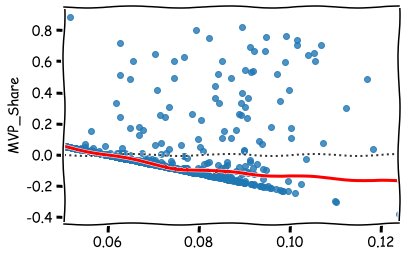

In [349]:


plot = plt.figure(1)
plot.axes[0] = sns.residplot(fitted_values, 'MVP_Share', data=ex_training, lowess=True,
                             line_kws={'color': 'red', 'lw': 3, })

# Linearish. I'd say yes

#### Checking Normal Distribution

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


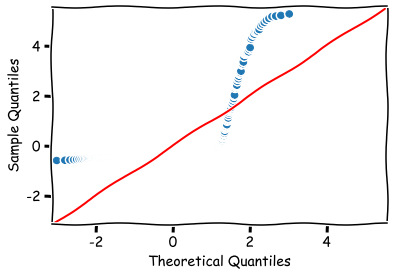

In [350]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(ex_model_m_norm_residuals)
plot_2 = QQ.qqplot(line='45', color='red', lw=1)

# Not Normally Distributed

#### Checking Equal Variance

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

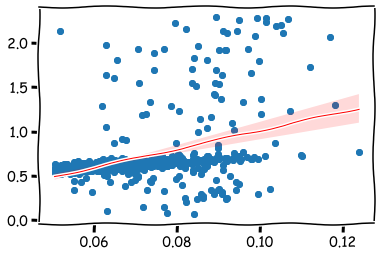

In [351]:
plot_lm_3 = plt.figure(3)

plt.scatter(fitted_values, ex_model_m_norm_residuals_abs_sqrt, )
sns.regplot(fitted_values, ex_model_m_norm_residuals_abs_sqrt, line_kws={'color': 'red', 'lw': 1, })

# NotEqual Variance

In [352]:
ex_test_m = ex_model_m.outlier_test()
test_final_m = ex_test_m[ex_test_m['bonf(p)'] < 0.05]

X_train_no_outliers = X_train.drop(test_final_m.index)
y_train_no_outliers = y_train.drop(test_final_m.index)



In [353]:
model_no_outliers = sm.OLS(y_train_no_outliers, X_train_no_outliers).fit()

model_no_outliers.summary()

# It actually got worse.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              MVP_Share   R-squared (uncentered):                   0.136
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              41.22
Date:                Fri, 15 Jul 2022   Prob (F-statistic):                    9.46e-25
Time:                        11:23:32   Log-Likelihood:                          540.54
No. Observations:                 791   AIC:                                     -1075.
Df Residuals:                     788   BIC:                                     -1061.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS           -0.0003      0.001     -0.428      0.668      -0.002       0.001
AST            0.0036      0.002      1.885      0.060      -0.000       0.007
TRB            0.0058      0.002      3.282      0.001       0.002       0.009
==============================================================================
Omnibus:                      662.462   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10167.856
Skew:                           3.955   Prob(JB):                         0.00
Kurtosis:                      18.682   Cond. No.                         10.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
prediction = model.predict(X_test[['PTS', ]])

sns.scatterplot(x=X_test.Age, y=y_test, color='green')
sns.scatterplot(x=X_test.Age, y=prediction, color='red')

# Polynomial Regression

In [354]:
df = pd.read_csv('../../Data/Players With Award Data/complete_players_with_award_voting.csv', index_col=0)
df = df[(df.PTS > 15) & (df.GS > 45) & (df.MP > 30) & (df.FGA > 10) & (df.TRB > 3) & (df.AST > 2.5)]

X_train, X_test, y_train, y_test = train_test_split(df[['PTS']], df['MVP_Share'], test_size=.3, random_state=42)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ROTY_Pts Won,ROTY_Pts Max,ROTY_Share,ROTY,SMOTY_Rank,SMOTY_First,SMOTY_Pts Won,SMOTY_Pts Max,SMOTY_Share,SMOTY
129,Larry Bird,PF,23.0,BOS,82.0,82.0,36.0,8.5,17.8,0.4775,...,63.0,66.0,0.9545,True,0.0,0.0,0.0,-1.0,0.0,False
150,Julius Erving,SF,29.0,PHI,78.0,78.0,36.1,10.7,20.7,0.5169,...,0.0,-1.0,0.0000,False,0.0,0.0,0.0,-1.0,0.0,False
402,Larry Bird,PF,24.0,BOS,82.0,82.0,39.5,8.8,18.3,0.4809,...,0.0,-1.0,0.0000,False,0.0,0.0,0.0,-1.0,0.0,False
506,Julius Erving,SF,30.0,PHI,82.0,82.0,35.0,9.7,18.6,0.5215,...,0.0,-1.0,0.0000,False,0.0,0.0,0.0,-1.0,0.0,False
602,Dan Roundfield,PF,28.0,ATL,61.0,58.0,36.3,7.0,14.9,0.4698,...,0.0,-1.0,0.0000,False,0.0,0.0,0.0,-1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,Damian Lillard,PG,27.0,POR,73.0,73.0,36.6,8.5,19.4,0.4381,...,0.0,505.0,0.0000,False,0.0,0.0,0.0,505.0,0.0,False
15981,Kyle Lowry,PG,31.0,TOR,78.0,78.0,32.2,5.2,12.1,0.4298,...,0.0,505.0,0.0000,False,0.0,0.0,0.0,505.0,0.0,False
16008,Chris Paul,PG,32.0,HOU,58.0,58.0,31.8,6.3,13.8,0.4565,...,0.0,505.0,0.0000,False,0.0,0.0,0.0,505.0,0.0,False
16035,Jamal Murray,PG,20.0,DEN,81.0,80.0,31.7,5.9,13.1,0.4504,...,0.0,505.0,0.0000,False,0.0,0.0,0.0,505.0,0.0,False


In [355]:
X_train['PTS_2'] = np.power(X_train.PTS, 2)
X_train['PTS_3'] = np.power(X_train.PTS, 3)


In [356]:
X_test['PTS_2'] = np.power(X_test.PTS, 2)
X_test['PTS_3'] = np.power(X_test.PTS, 3)


In [357]:
ex_data_poly = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

model.summary()

# Best results so far based on R2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              MVP_Share   R-squared (uncentered):                   0.313
Model:                            OLS   Adj. R-squared (uncentered):              0.310
Method:                 Least Squares   F-statistic:                              122.1
Date:                Fri, 15 Jul 2022   Prob (F-statistic):                    3.49e-65
Time:                        11:23:33   Log-Likelihood:                          365.08
No. Observations:                 808   AIC:                                     -724.2
Df Residuals:                     805   BIC:                                     -710.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTS            0.0058      0.006      0.990      0.322      -0.006       0.017
PTS_2         -0.0010      0.001     -1.950      0.052      -0.002    6.57e-06
PTS_3       3.761e-05   1.06e-05      3.553      0.000    1.68e-05    5.84e-05
==============================================================================
Omnibus:                      488.390   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4981.905
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      13.987   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [358]:
ex_prediction_poly = model.predict(X_test[['PTS', 'PTS_2', 'PTS_3', ]])


<AxesSubplot:xlabel='PTS', ylabel='MVP_Share'>

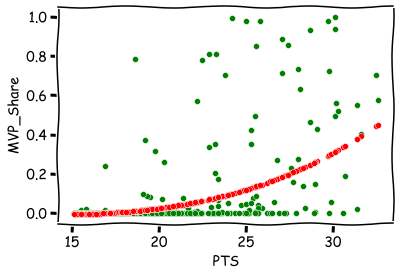

In [359]:

sns.scatterplot(x=X_test.PTS, y=y_test, color='green')
sns.scatterplot(x=X_test.PTS, y=ex_prediction_poly, color='red')

# This seems to show that (generally),
# the more points you score,
# the more votes you get, which makes sense.

# Log Lin Model

In [368]:
df = pd.read_csv('../../Data/Players With Award Data/complete_players_with_award_voting.csv', index_col=0)
df = df[(df.PTS > 15) & (df.GS > 45) & (df.MP > 30) & (df.FGA > 10) & (df.TRB > 3) & (df.AST > 2.5)]

X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['PTS'], test_size=.3, random_state=42)


#### I'm switching to using PTS as my Y for this model.

Text(0.5, 1.0, 'Points scored by age')

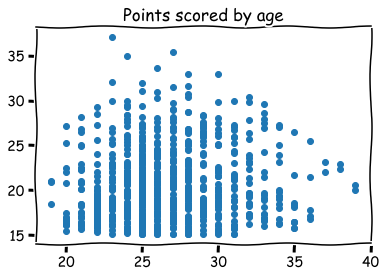

In [369]:
plt.scatter(X_train, y_train, )
plt.title('Points scored by age')


In [370]:
df['PTS_log_lin'] = np.log(df['PTS'])

ex_data_loglin = sm.add_constant(df)

df.PTS_log_lin.head()


129    3.058707
150    3.292126
402    3.054001
506    3.202746
602    2.923162
Name: PTS_log_lin, dtype: float64

In [371]:
model = sm.OLS(y_train, X_train).fit()

model.summary()

# R2 is really good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PTS   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          1.546e+04
Date:                Fri, 15 Jul 2022   Prob (F-statistic):                        0.00
Time:                        11:25:51   Log-Likelihood:                         -2396.4
No. Observations:                 808   AIC:                                      4795.
Df Residuals:                     807   BIC:                                      4800.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.7649      0.006    124.339      0.000       0.753       0.777
==============================================================================
Omnibus:                       16.416   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.109
Skew:                           0.321   Prob(JB):                     0.000193
Kurtosis:                       3.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
prediction = model.predict(X_test[['Age', ]])


<AxesSubplot:xlabel='Age', ylabel='PTS'>

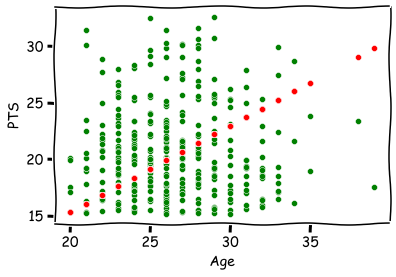

In [374]:

sns.scatterplot(x=X_test.Age, y=y_test, color='green')
sns.scatterplot(x=X_test.Age, y=prediction, color='red')

# This Indicates that the older you get the more points you score,
# which is not true.

# In actuality scoring peaks sometime between 23-30, then drops.

# Some Static and interactive plots

In [439]:
df = pd.read_csv('../../Data/Players With Award Data/complete_players_with_award_voting.csv', index_col=0)
df = df[(df.PTS > 15) & (df.GS > 45) & (df.MP > 30) & (df.FGA > 10) & (df.TRB > 3) & (df.AST > 2.5)]

sns.set(style="ticks")
# X_train, X_test, y_train, y_test = train_test_split(df[['PTS']], df['MVP_Share'], test_size=.3,random_state=42)


In [440]:
px.scatter(x='Year', y='PTS', data_frame=df, size_max=.1, color='MVP', hover_name='Player')

<AxesSubplot:xlabel='Year', ylabel='PTS'>

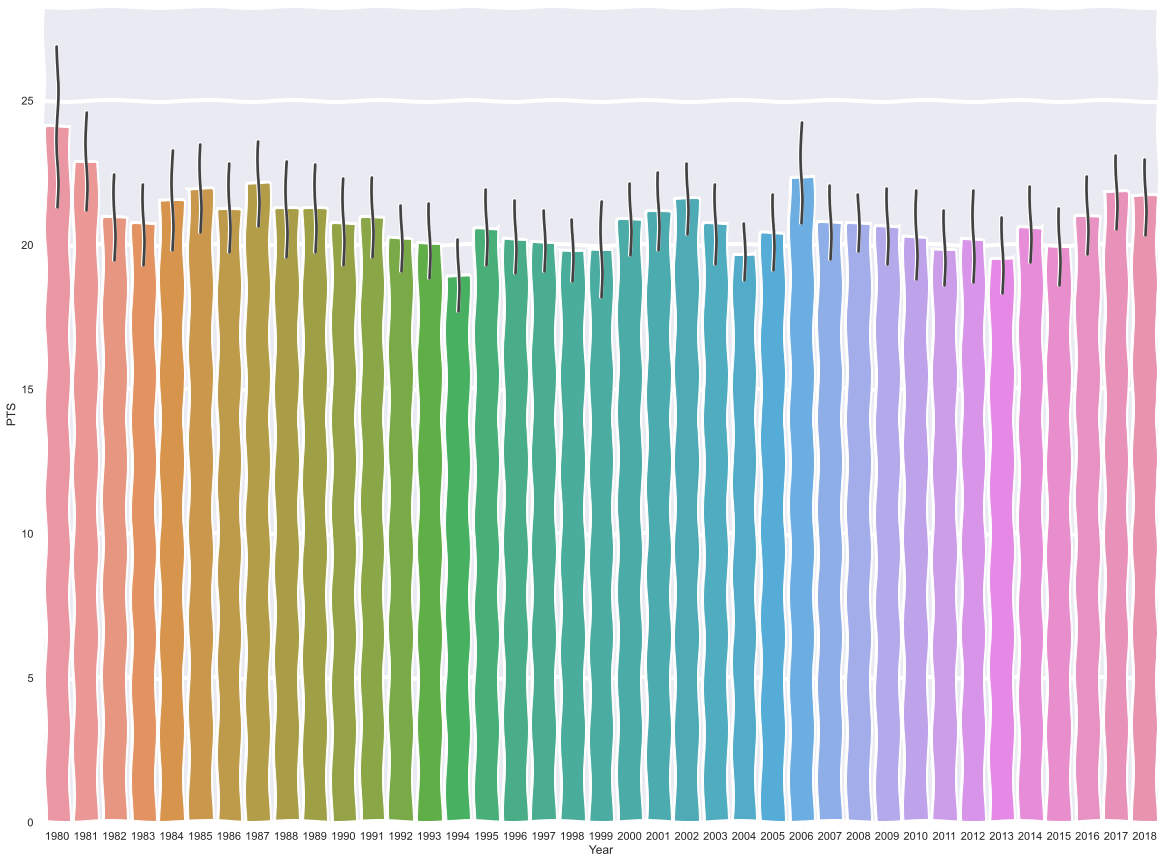

In [441]:
sns.set(rc={"figure.figsize": (20, 15)})
sns.barplot(x=df.Year, y=df.PTS, )

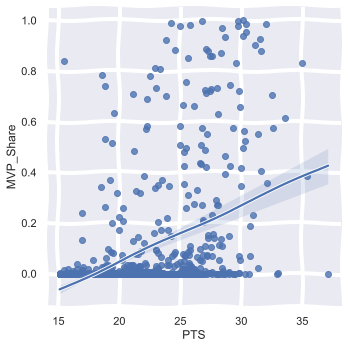

In [442]:
sns.lmplot(x='PTS', y='MVP_Share', fit_reg=True, data=df, )

<AxesSubplot:xlabel='PTS', ylabel='MVP_Share'>

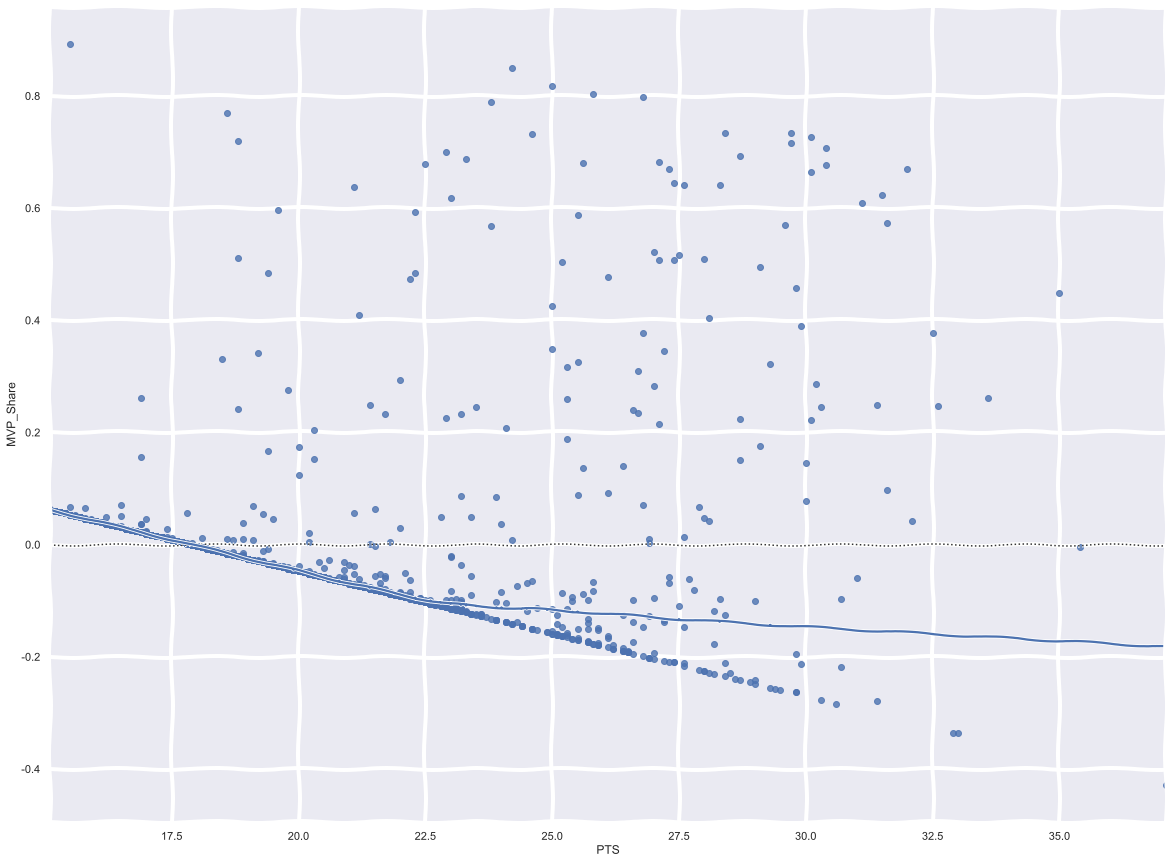

In [443]:
sns.residplot(x="PTS", y="MVP_Share", lowess=True, data=df, )

In [444]:
px.pie(df, names='Pos', values='PTS', labels='Pos', title='Points scored by position')

/Users/chaseallbright/Dropbox/NBA/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PTS'>

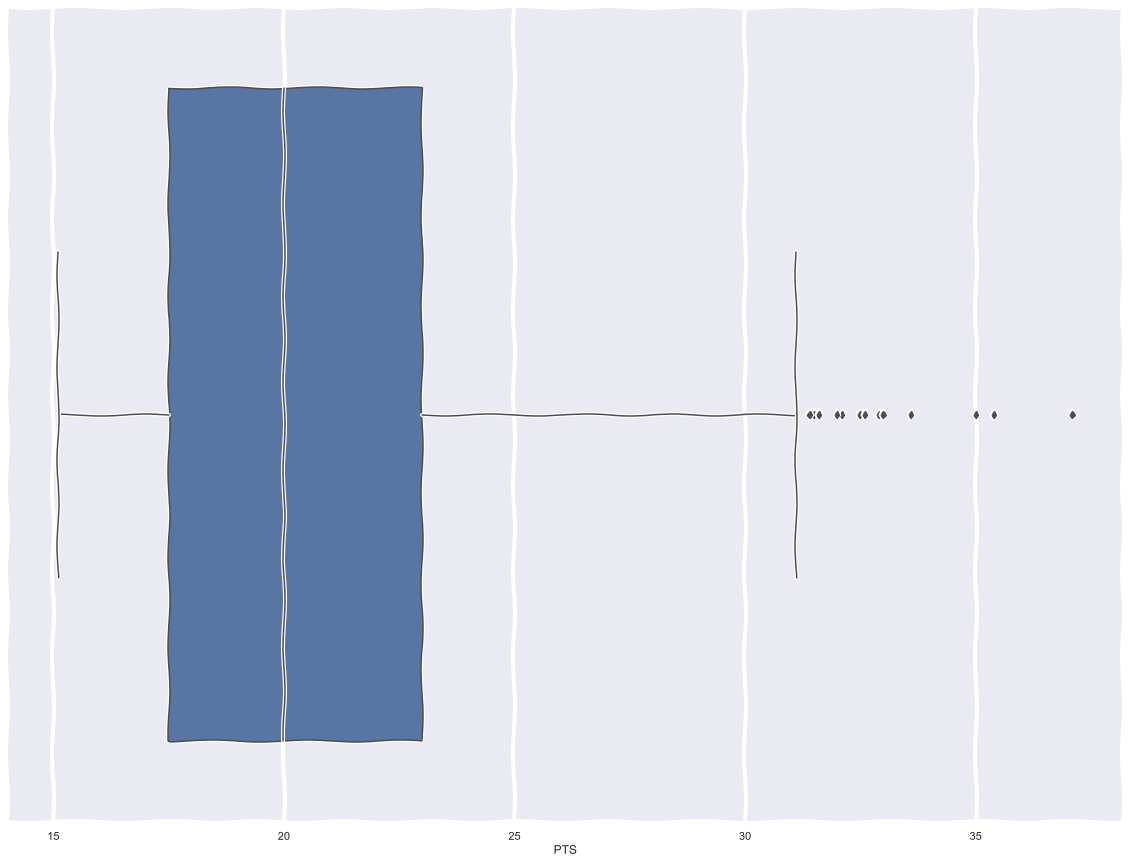

In [445]:
sns.boxplot(df.PTS)


<AxesSubplot:xlabel='PTS', ylabel='Count'>

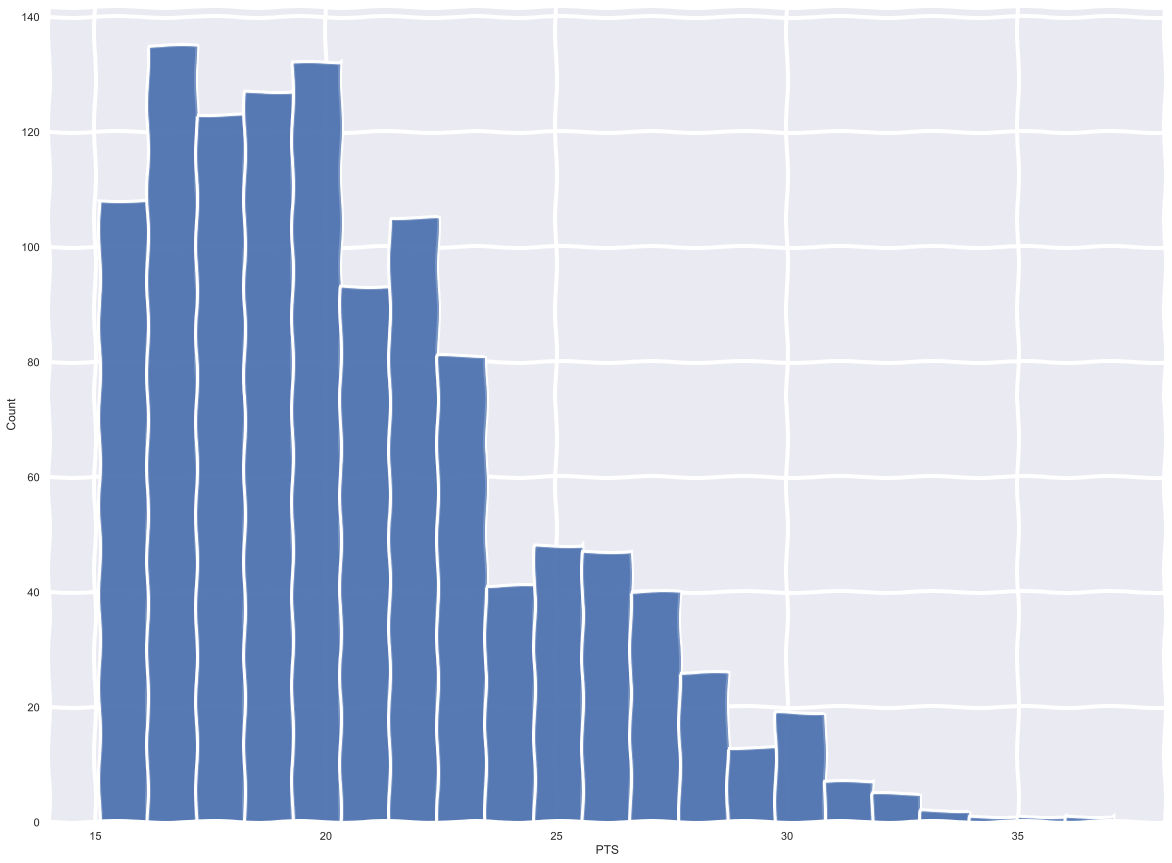

In [446]:
sns.histplot(df.PTS)

<AxesSubplot:xlabel='TRB', ylabel='Count'>

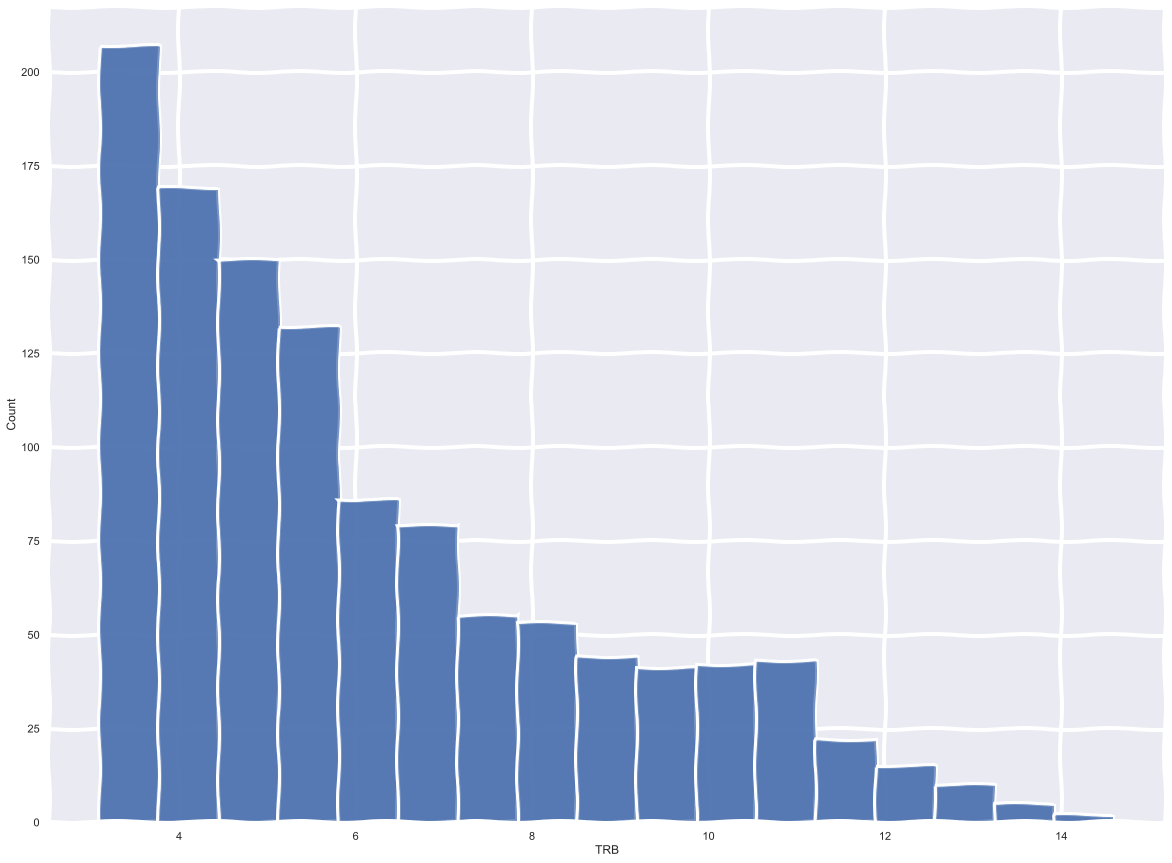

In [447]:
sns.histplot(df.TRB, )